In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv('./data.csv')
data2

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [3]:
data2[data2.columns] = data2[data2.columns].astype('Int64')

data2 = data2.drop('Final_EDSS', axis=1)
data2 = data2.drop('Unnamed: 0', axis=1)
data2 = data2.drop('Initial_EDSS', axis=1)

data2['group'] = data2['group'].replace(2, 0)
data2

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,0,0,0,0,0,0,0
269,1,21,15,3,3,5,2,1,0,0,0,0,0,0,0,1,0
270,2,19,12,3,3,13,2,0,1,1,1,0,0,0,0,1,0
271,2,32,15,3,3,15,2,1,1,1,1,0,1,1,1,0,0


In [4]:
data2["group"  ].value_counts()

group
0    148
1    125
Name: count, dtype: Int64

In [5]:
# Verificando si hay valores nulos por columna
print(data2.isnull().sum())

Gender                     0
Age                        0
Schooling                  1
Breastfeeding              0
Varicella                  0
Initial_Symptom            1
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64


In [6]:
from sklearn.impute import SimpleImputer
# Crear un imputador para las columnas con valores faltantes
imputer = SimpleImputer(strategy='mean')

# Seleccionar las columnas con valores faltantes
columns_with_nan = ['Schooling', 'Initial_Symptom']

# Imputar los valores faltantes en las columnas específicas
data2[columns_with_nan] = imputer.fit_transform(data2[columns_with_nan])

# Verificar si aún hay valores nulos en el DataFrame
if data2.isnull().values.any():
    # Imputar cualquier otro valor faltante en el DataFrame completo
    data2 = pd.DataFrame(imputer.fit_transform(data2), columns=data2.columns)


X = data2.drop('group', axis=1)
y = data2['group']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_val = model.predict(X_val)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

Accuracy: 0.7818181818181819


In [9]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[22  6]
 [ 6 21]]


In [10]:
# Calcular AUC-ROC
y_prob_val = model.predict_proba(X_val)[:, 1]
auc_roc = roc_auc_score(y_val, y_prob_val)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8849206349206349


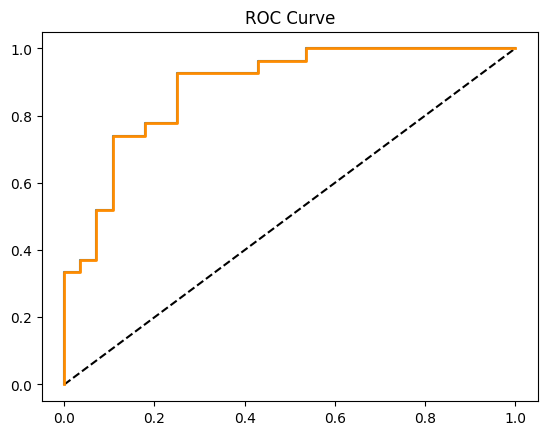

In [11]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
plt.plot(fpr, tpr,)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % auc_roc)
plt.show()

In [12]:
# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Crear un DataFrame con los coeficientes y los nombres de las características
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})

# Convertir los coeficientes a valores absolutos y ordenar por valor absoluto (mayor a menor importancia)
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

print(coef_df)

# Interpretar los coeficientes
for index, row in coef_df.iterrows():
    feature = row['feature']
    coef = row['coefficient']
    if coef > 0:
        print(f"Un aumento en '{feature}' se asocia con un aumento en la probabilidad de pertenecer a la clase positiva.")
    else:
        print(f"Un aumento en '{feature}' se asocia con una disminución en la probabilidad de pertenecer a la clase positiva.")

                    feature  coefficient  abs_coefficient
12      Periventricular_MRI     2.367148         2.367148
14       Infratentorial_MRI     1.620225         1.620225
6   Mono_or_Polysymptomatic    -1.529590         1.529590
11                     BAEP    -1.253699         1.253699
7         Oligoclonal_Bands     0.823746         0.823746
13             Cortical_MRI     0.613362         0.613362
0                    Gender    -0.533943         0.533943
9                    ULSSEP    -0.514118         0.514118
10                      VEP     0.464562         0.464562
3             Breastfeeding    -0.435403         0.435403
8                    LLSSEP     0.425864         0.425864
5           Initial_Symptom     0.342512         0.342512
15          Spinal_Cord_MRI     0.250230         0.250230
2                 Schooling     0.135722         0.135722
4                 Varicella    -0.022958         0.022958
1                       Age     0.005093         0.005093
Un aumento en 